<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>replace with your group id here</code><b>

<b>Group Members:</b>  

1. <code>Deep_Pravinbhai_B00938094</code>
2. <code>Kush_B00928066</code>


# 1. Dataset Information

<h4> Dataset Name: <code> Tollywood</code></h4>
<h4> Link to the Dataset: <code>https://drive.google.com/drive/folders/19_g5EPb2bs9ov9GYa4_aZz_F8sdCTYyP?usp=drive_link</code> </h4>
<h4> Dataset Description: </h4>
<code> The Tollywood(South Indian Cinema) Actors and Actresses Image Dataset is a comprehensive collection of 2,548 images showcasing 20 prominent figures from the entertainment industry. The dataset encompasses a diverse range of actors and actresses, providing a rich resource for various computer vision and machine learning applications.<br/> <br/>
<b>Data Collection:</b>
The dataset was meticulously curated using the "Image Downloader - Image Finder" Chrome extension, a tool designed for efficient bulk image scraping. Images were gathered at a resolution of 128x128 pixels and higher, ensuring a sufficient level of detail for analysis. On average, each individual actor or actress is represented by a substantial collection ranging from 90 to 180 images.<br/><br/>
<b>Organizational Structure:</b>
To enhance accessibility and ease of use, the dataset is structured in a systematic manner. Each actor's or actress's images are organized into individual folders, with each folder named after the respective personality. This hierarchical organization facilitates seamless navigation and retrieval of specific data, promoting an efficient workflow for researchers and developers.<br/><br/>
<b>Actor Diversity:</b>
The dataset features a diverse array of Tollywood actors and actresses, encompassing various genres, age groups, and career stages. This diversity allows for robust model training and testing across a wide spectrum of visual characteristics.
 </code>

# 2. Task Information

<h4> Task Goal: <code> Identifying and classifying Tollywood actors and actress from facial images </code></h4>
<h4> Task Description: </h4>
    <code> To enhance data quality, manual cleaning is conducted to eliminate misclassified images associated with specific individuals from Tollywood(South Indian Cinema). Duplicate removal is carried out through a two-step process: first, exact duplicates are identified using hash functions, and then similar images are eliminated based on the Z transformation using dhash.<br/><br/>
    To address class imbalance and reduce overfitting, data points are strategically reduced through random data selection and/or class elimination.<br/><br/>
    The classification task utilizes multiple machine learning models:<br/>
    <b>CNN (Convolutional Neural Network)</b>: Beneficial for image classification due to its ability to capture spatial hierarchies and patterns in images.<br/>
    <b>SVM (Support Vector Machine)</b>: Effective for binary and multiclass classification, SVMs are known for their versatility and robust performance.<br/>
    <b>Linear Regression</b>: Though primarily used for regression tasks, it can be applied to binary classification problems and serves as a baseline model for comparison.<br/>
    <b>Random Forest</b>: A versatile ensemble learning algorithm, beneficial for handling large datasets with high dimensionality and capturing complex relationships.<br/><br/>
    Evaluation involves assessing classification results and scores, comparing the performance of different models to determine the most effective approach for the given image classification task.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing

In [ ]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH_TO_TOLLYWOOD_M="/content/drive/MyDrive/CSCI6515_Project_dataset/project_dataset_ml_6515/tollywood_w_gender/1/male"
PATH_TO_TOLLYWOOD_M_CROP="/content/drive/MyDrive/CSCI6515_Project_dataset/project_dataset_ml_6515/tollywood_w_gender/1/male/cropped"
PATH_TO_TOLLYWOOD_F="/content/drive/MyDrive/CSCI6515_Project_dataset/project_dataset_ml_6515/tollywood_w_gender/1/female"
PATH_TO_TOLLYWOOD_F_CROP="/content/drive/MyDrive/CSCI6515_Project_dataset/project_dataset_ml_6515/tollywood_w_gender/1/female/cropped"

#### Applying Cropping Techniques on Single Image

In [ ]:
img1=cv2.imread(PATH_TO_TOLLYWOOD_F+"/Anushka Shetty/6187a41c0d79f_1.jpg")

In [ ]:
img1.shape

(1244, 700, 3)

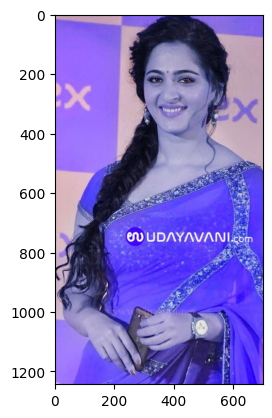

In [ ]:
plt.imshow(img1)

In [ ]:
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

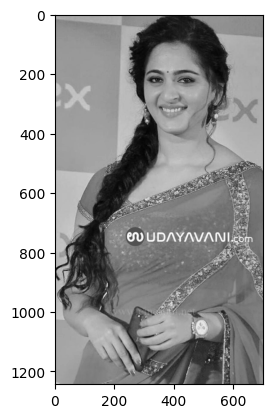

In [ ]:
plt.imshow(gray,cmap='gray')

In [ ]:
faceCascade = cv2.CascadeClassifier('/content/drive/MyDrive/CSCI6515_Project_dataset/haarcascades/haarcascade_frontalface_default.xml');

In [ ]:
eyeCascade= cv2.CascadeClassifier('/content/drive/MyDrive/CSCI6515_Project_dataset/haarcascades/haarcascade_eye.xml')

In [ ]:
face1=faceCascade.detectMultiScale(gray,1.3,5)

In [ ]:
face1

array([[255, 113, 277, 277]], dtype=int32)

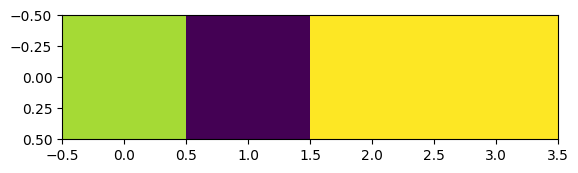

In [ ]:
plt.imshow(face1)

In [ ]:
x,y,w,h=face1[0]

In [ ]:
face_img=cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)

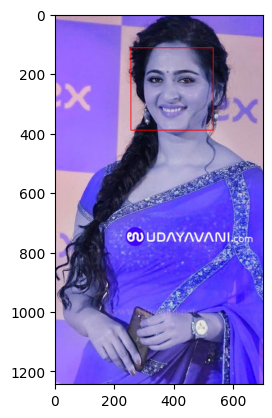

In [ ]:
plt.imshow(face_img)

**Descriptive Analysis:**

Plot shows the bounding box over the detected face in the image

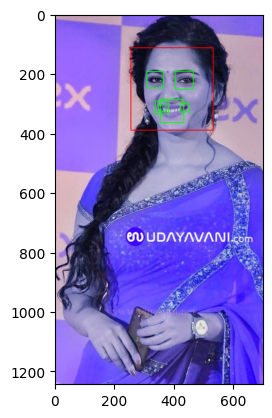

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in face1:
    face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

**Descriptive Analysis:**

Plot shows the dimesion eye detection and creating green bound boxes for the same

In [ ]:
def get_cropped_faces(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to load the image. Please check the file path.", image_path)
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.2, 4)
    roi_colors = []
    for (x,y,w,h) in faces:
        print("faces detected:", len(faces))
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyeCascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            roi_colors.append(roi_color)
    return roi_colors

**Descriptive Analysis:**

Funtion to get cropped image for the provided image path. It finds the all the detected faces and returns an array of images for the same

In [ ]:
cropped_faces = get_cropped_faces(PATH_TO_TOLLYWOOD_F+"/Anushka Shetty/6187a41c0d79f_1.jpg")

faces detected: 1


In [ ]:
cropped_faces

[array([[[143, 120, 148],
         [150, 131, 152],
         [128, 112, 129],
         ...,
         [ 14,  15,  35],
         [ 15,  16,  36],
         [ 15,  19,  38]],
 
        [[110,  88, 116],
         [113,  98, 119],
         [ 98,  87, 103],
         ...,
         [ 14,  16,  34],
         [ 14,  16,  34],
         [ 13,  17,  36]],
 
        [[ 79,  64,  95],
         [ 79,  69,  92],
         [ 72,  65,  86],
         ...,
         [ 15,  17,  35],
         [ 13,  15,  33],
         [ 13,  14,  34]],
 
        ...,
 
        [[207, 181, 195],
         [209, 184, 198],
         [209, 184, 198],
         ...,
         [160, 135, 149],
         [158, 133, 147],
         [160, 136, 148]],
 
        [[209, 183, 197],
         [210, 185, 199],
         [209, 184, 198],
         ...,
         [162, 137, 151],
         [161, 136, 150],
         [164, 140, 152]],
 
        [[210, 184, 198],
         [210, 185, 199],
         [209, 184, 198],
         ...,
         [162, 137, 151],
  

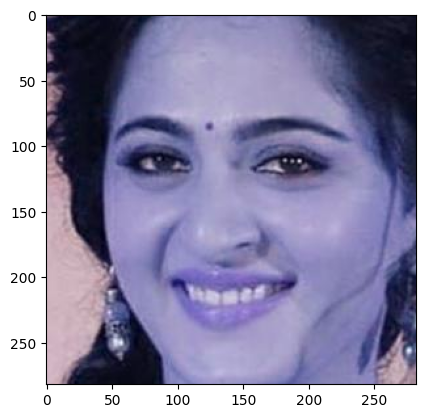

In [ ]:
plt.imshow(cropped_faces[0])

**Descriptive Analysis:**

Plot shows the final cropped image.

#### Generating Cropped Images

In [ ]:
import os

def get_image_dir(dir_path):
  img_dirs = []
  for entry in os.scandir(dir_path):
      if entry.is_dir():
          img_dirs.append(entry.path)
  return img_dirs

**Descriptive Analysis:**

A function to return image directories provided the root directory path

In [ ]:
import shutil

def create_cropped_dir_if_absent(dir_path):
  if os.path.exists(dir_path):
      shutil.rmtree(dir_path)

  os.mkdir(dir_path)

**Descriptive Analysis:**

Function creates cropped directory if absent to store all cropped images for actors and actress'

In [ ]:
def get_cropped_faces_w_gs(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to load the image. Please check the file path.", image_path)
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    for scale_factor in [1.2, 1.3, 1.4]:
        for min_neighbors in [3, 4, 5]:
            faces = faceCascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=min_neighbors)
            roi_colors = []
            for (x, y, w, h) in faces:
                print("Faces detected:", len(faces))
                roi_gray = gray[y:y + h, x:x + w]
                roi_color = img[y:y + h, x:x + w]
                eyes = eyeCascade.detectMultiScale(roi_gray)
                if len(eyes) >= 2:
                    roi_colors.append(roi_color)
    return roi_colors

**Descriptive Analysis:**

The function performs grid serach to maximize the numbers of faces detected from a given image. It tunes `scaleFactor` and `minNeighours`

In [ ]:
def generate_croppped_data(data_path, cropped_data_path):

  image_dirs = get_image_dir(data_path)
  create_cropped_dir_if_absent(cropped_data_path)

  cropped_image_dirs = []
  celeb_file_names_dict = {}
  total_count = 1
  for img_dir in image_dirs:
      count = 1
      celebrity_name = img_dir.split('/')[-1]
      if(celebrity_name == "cropped"):
          return [image_dirs, cropped_image_dirs]
      print("Celebrity:\t", celebrity_name)
      print("----------------------------------------------")

      celeb_file_names_dict[celebrity_name] = []

      for entry in os.scandir(img_dir):
          extension = entry.name.split('.')[-1]
          # change function here to get_cropped_face() if grid search is not required for parameter tuning
          roi_colors = get_cropped_faces_w_gs(entry.path)
          if roi_colors is not None:
              cropped_folder = cropped_data_path + "/" + celebrity_name
              if not os.path.exists(cropped_folder):
                  os.makedirs(cropped_folder)
                  cropped_image_dirs.append(cropped_folder)
                  print("Generating cropped images in folder: ",cropped_folder)
              for roi_color in roi_colors:
                  cropped_file_name = celebrity_name + str(count) + "." + extension
                  cropped_file_path = cropped_folder + "/" + cropped_file_name
                  cv2.imwrite(cropped_file_path, roi_color)
                  celeb_file_names_dict[celebrity_name].append(cropped_file_path)
                  count += 1
      total_count += count
      print("Total faces:", total_count)

  return [image_dirs, cropped_image_dirs]

**Descriptive Analysis:**

This function generates cropped images from all the dataset by providing root directory path of dataset and path to store cropped data.

In [ ]:
tollywood_m_img_dirs, cr_tollywood_m_img_dirs = generate_croppped_data(PATH_TO_TOLLYWOOD_M, PATH_TO_TOLLYWOOD_M_CROP)

In [ ]:
tollywood_f_img_dirs, cr_tollywood_f_img_dirs = generate_croppped_data(PATH_TO_TOLLYWOOD_F, PATH_TO_TOLLYWOOD_F_CROP)

**Descriptive Analysis:**

Cropped images are generated after this step. They need to be manually cleaned to match desired class labels.

#### Pre-processing After Manual Data Cleaning



In [ ]:
PREPROCESSED_TOLLYWOOD_PATH="/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/"

In [ ]:
img_dirs = get_image_dir(PREPROCESSED_TOLLYWOOD_PATH)

In [ ]:
img_dirs

['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Kamal Haasan',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Prabhas',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Dulquer Salmaan',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Suriya',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Rajinikanth',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Mahesh Babu',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/NTR Jr_ _Nandamuri Taraka Rama Rao Jr__',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Allu Arjun',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Rashmika Mandanna',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty',


In [ ]:
celeb_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celeb_file_names_dict[celebrity_name] = file_list
celeb_file_names_dict

{'Ajith Kumar': ['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar2.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar3.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar5.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar6.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar11.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar12.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar16.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar17.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar18.jpg',
  '/content/drive/MyDr

[36, 85, 60, 82, 83, 14, 66, 54, 56, 70, 126, 64, 98, 120, 106, 116, 109, 69, 106, 98, 21]


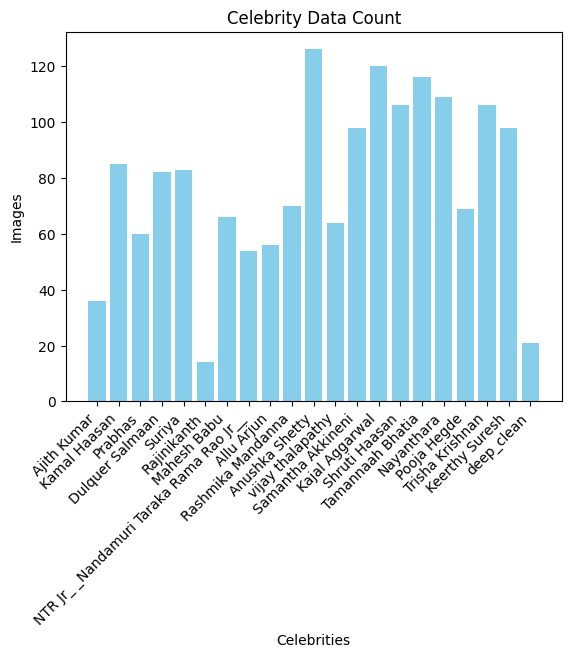

In [ ]:
celebrities = list(celeb_file_names_dict.keys())
img_count = [len(images) for images in celeb_file_names_dict.values()]
print(img_count)

plt.bar(celebrities, img_count, color='skyblue')
plt.xlabel('Celebrities')
plt.ylabel('Images')
plt.title('Celebrity Data Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Descriptive Analysis:**

Plot shows the classwise no. of image distribution. The class with less images *Raijinkanth* and *Ajith Kumar* can be dropped.

In [ ]:
import copy

# Create a deep copy of the original dictionary
deep_copied_celeb_files_dict = copy.deepcopy(celeb_file_names_dict)

deep_copied_celeb_files_dict.pop('Rajinikanth', None)
deep_copied_celeb_files_dict.pop('Ajith Kumar', None)
deep_copied_celeb_files_dict.pop('deep_clean', None)

**Descriptive Analysis:**

Deep copying dictionary after droping class based on the plot above.

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celeb_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Ajith Kumar': 0,
 'Kamal Haasan': 1,
 'Prabhas': 2,
 'Dulquer Salmaan': 3,
 'Suriya': 4,
 'Rajinikanth': 5,
 'Mahesh Babu': 6,
 'NTR Jr_ _Nandamuri Taraka Rama Rao Jr__': 7,
 'Allu Arjun': 8,
 'Rashmika Mandanna': 9,
 'Anushka Shetty': 10,
 'vijay thalapathy': 11,
 'Samantha Akkineni': 12,
 'Kajal Aggarwal': 13,
 'Shruti Haasan': 14,
 'Tamannaah Bhatia': 15,
 'Nayanthara': 16,
 'Pooja Hegde': 17,
 'Trisha Krishnan': 18,
 'Keerthy Suresh': 19,
 'deep_clean': 20}



##### Reducing Data Redundancy

In [ ]:
import hashlib

In [ ]:
def get_file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

**Descriptive Analysis:**

Function to get md5 hash after reading the image

In [ ]:
os.listdir(PREPROCESSED_TOLLYWOOD_PATH)

['Ajith Kumar',
 'Kamal Haasan',
 'Prabhas',
 'Dulquer Salmaan',
 'Suriya',
 'Rajinikanth',
 'Mahesh Babu',
 'NTR Jr_ _Nandamuri Taraka Rama Rao Jr__',
 'Allu Arjun',
 'Rashmika Mandanna',
 'Anushka Shetty',
 'vijay thalapathy',
 'Samantha Akkineni',
 'Kajal Aggarwal',
 'Shruti Haasan',
 'Tamannaah Bhatia',
 'Nayanthara',
 'Pooja Hegde',
 'Trisha Krishnan',
 'Keerthy Suresh']

In [ ]:
# [Removing Duplicate Images through Python](https://medium.com/@urvisoni/removing-duplicate-images-through-python-23c5fdc7479e)

duplicates = []
hash_keys = dict()
for celebrity, image_paths in celeb_file_names_dict.items():
    for path in image_paths:
      if os.path.isfile(path):
          with open(path, 'rb') as f:
              filehash = hashlib.md5(f.read()).hexdigest()
          if filehash not in hash_keys:
              hash_keys[filehash] = celebrity
          else:
              duplicates.append((celebrity,hash_keys[filehash], path))

**Descriptive Analysis:**

This gives an array `duplicates` where the duplicate images from the cropped images are found.

In [ ]:
duplicates

[(19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty8.jpg'),
 (19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty10.jpeg'),
 (19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty13.jpg'),
 (19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty15.jpg'),
 (19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty47.jpeg'),
 (19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty102.jpeg'),
 (19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty105.jpg'),
 (19,
  19,
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shet

**Descriptive Analysis:**

Provided images are removed from the cropped dataset.

In [ ]:
# [Removing Duplicate or Similar Images in Python](https://towardsdatascience.com/removing-duplicate-or-similar-images-in-python-93d447c1c3eb)
!pip install imagehash
import imagehash
from PIL import Image

def eliminate_alpha(image):
    if image.mode != 'RGBA':
        return image
    canvas = Image.new('RGBA', image.size, (255,255,255,255))
    canvas.paste(image, mask=image)
    return canvas.convert('RGB')

def with_ztransform_preprocess(hash_func, hash_size=8):
    def function(path):
        image = eliminate_alpha(Image.open(path))
        image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)
        data = image.getdata()
        quantiles = np.arange(100)
        quantiles_values = np.percentile(data, quantiles)
        zdata = (np.interp(data, quantiles_values, quantiles) / 100 * 255).astype(np.uint8)
        image.putdata(zdata)
        return hash_func(image)
    return function
dhash_z_transformed = with_ztransform_preprocess(imagehash.dhash, hash_size = 10)

**Descriptive Analysis:**

Functions to handle removal of duplicate or similar images using z-tranformation.

In [ ]:
duplicates_z_transform = []
hash_keys_z_transform = dict()
for celebrity, image_paths in celeb_file_names_dict.items():
    for path in image_paths:
        if not path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            continue
        if os.path.isfile(path):
            with open(path, 'rb') as f:
                filehash = dhash_z_transformed(path)
                print(f"{path}: {filehash}")

            if filehash not in hash_keys_z_transform:
                hash_keys_z_transform[filehash] = path
            else:
                duplicates_z_transform.append((path, hash_keys_z_transform[filehash]))

<ipython-input-126-7c6826be5267>:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)


/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar2.jpeg: cdf33773d3dbabb7
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar3.jpeg: 7f6b32734f0fd6fb
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar5.jpeg: c082133327078787
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar6.jpg: e4b09212c40da2a1
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar11.jpg: 3c7c363a5e4f1f3e
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar12.jpg: 094111322486b4d3
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar16.jpg: c1f073f1cdccf068
/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Ajith Kumar/Ajith Kumar17.jpeg: 6f0d3333330f4f6e
/content/drive/MyDrive/CSCI6515_Project_

**Descriptive Analysis:**

Duplicate or similar images are detected using z-tranformation and stored in `duplicates_z_transform` array.

In [ ]:
duplicates_z_transform

[('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Dulquer Salmaan/Dulquer Salmaan97.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Dulquer Salmaan/Dulquer Salmaan98.jpeg'),
 ('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Suriya/Suriya44.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Suriya/Suriya18.jpg'),
 ('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty8.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty8 (1).jpg'),
 ('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty10.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty10 (1).jpeg'),
 ('/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/Anushka Shetty/Anushka Shetty13.jpg'

##### Reducing Imbalanced Classes

In [ ]:
DC_TOLLYWOOD_PATH="/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean"

In [ ]:
dc_img_dirs = get_image_dir(DC_TOLLYWOOD_PATH)

In [ ]:
dc_img_dirs

['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Anushka Shetty',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Samantha Akkineni',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Ajith Kumar',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Dulquer Salmaan',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Kamal Haasan',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Prabhas',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Kajal Aggarwal',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rajinikanth',
 '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/NTR J

In [ ]:
dc_celeb_file_names_dict = {}
for img_dir in dc_img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    dc_celeb_file_names_dict[celebrity_name] = file_list
dc_celeb_file_names_dict

{'Rashmika Mandanna': ['/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna/Rashmika Mandanna1.jpeg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna/Rashmika Mandanna3.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna/Rashmika Mandanna4.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna/Rashmika Mandanna5.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna/Rashmika Mandanna6.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna/Rashmika Mandanna7.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/deep_clean/Rashmika Mandanna/Rashmika Mandanna8.jpg',
  '/content/drive/MyDrive/CSCI6515_Project_dataset/pre_processed_tollywood/

[36, 85, 60, 82, 83, 14, 66, 54, 56, 70, 126, 64, 98, 120, 106, 116, 109, 69, 106, 98, 21]


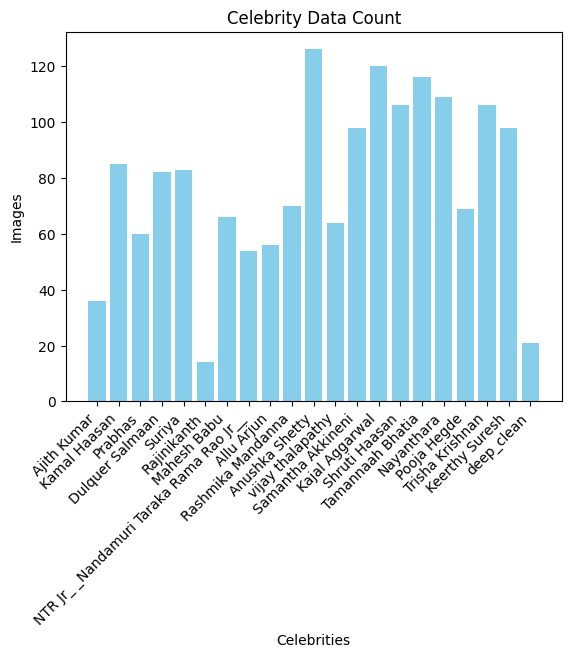

In [ ]:
dc_celebrities = list(dc_celeb_file_names_dict.keys())
dc_img_count = [len(images) for images in dc_celeb_file_names_dict.values()]
print(img_count)

plt.bar(celebrities, img_count, color='skyblue')
plt.xlabel('Celebrities')
plt.ylabel('Images')
plt.title('Celebrity Data Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Descriptive Analysis:**

Plot show the classwise distribution of the data.

In [ ]:
import copy

# Create a deep copy of the original dictionary
deep_copied_celeb_files_dict = copy.deepcopy(dc_celeb_file_names_dict)

deep_copied_celeb_files_dict.pop('Rajinikanth', None)
deep_copied_celeb_files_dict.pop('Ajith Kumar', None)
deep_copied_celeb_files_dict.pop('deep_clean', None)


In [ ]:
dc_class_dict = {}
count = 0
for celebrity_name in deep_copied_celeb_files_dict.keys():
    dc_class_dict[celebrity_name] = count
    count = count + 1
dc_class_dict

{'Rashmika Mandanna': 0,
 'Anushka Shetty': 1,
 'Samantha Akkineni': 2,
 'Dulquer Salmaan': 3,
 'Kamal Haasan': 4,
 'Prabhas': 5,
 'Kajal Aggarwal': 6,
 'NTR Jr_ _Nandamuri Taraka Rama Rao Jr__': 7,
 'Suriya': 8,
 'Tamannaah Bhatia': 9,
 'Mahesh Babu': 10,
 'Nayanthara': 11,
 'Shruti Haasan': 12,
 'Pooja Hegde': 13,
 'Allu Arjun': 14,
 'Keerthy Suresh': 15,
 'vijay thalapathy': 16,
 'Trisha Krishnan': 17}

### 3.2 Model development and training

In [ ]:
X_dc, y_dc = [], []
pro_count=0
for celebrity_name, training_files in deep_copied_celeb_files_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        pro_count+=1
        print(pro_count)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        scalled_raw_img=scalled_raw_img.reshape(32*32*3,1)

        X_dc.append(scalled_raw_img)
        y_dc.append(dc_class_dict[celebrity_name])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


**Descriptive Analysis:**

Scaling images to 32x32 pixels.

In [ ]:
X_dc = np.array(X_dc)
X_dc.shape

(1527, 3072, 1)

#### CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras
from sklearn.model_selection import train_test_split


model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.AdamW(), metrics=['accuracy'], run_eagerly=True)


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
X_dc = np.array(X_dc).reshape(1527, 3072).astype(float)
X_dc_train, X_dc_test, y_dc_train, y_dc_test = train_test_split(X_dc, y_dc, random_state=42)

**Descriptive Analysis:**

Reshaping back for making it compatible for other algorithms.

In [ ]:
print(X_dc_test.shape, X_dc_train.shape, len(y_dc_train), len(y_dc_test))

(382, 3072) (1145, 3072) 1145 382


In [ ]:
print(X_dc_train.shape)

(1145, 3072)


In [ ]:
print(X_dc_test.shape)


(382, 3072)


In [ ]:
def reshape_to_images(data):
    # Reshape each vector to 32x32x3 image format
    num_samples = data.shape[0]
    return data.reshape(num_samples, 32, 32, 3)

X_dc_train_images = reshape_to_images(X_dc_train)
X_dc_test_images = reshape_to_images(X_dc_test)


**Descriptive Analysis:**

Function to reshape images for performing CNN.

In [ ]:
from tensorflow.keras.utils import to_categorical

print('----------------------')
print (X_dc_train_images.shape)
y_dc_train_encoded = to_categorical(y_dc_train, num_classes=18)
y_dc_test_encoded = to_categorical(y_dc_test, num_classes=18)

----------------------
(1145, 32, 32, 3)


In [ ]:
import numpy as np

epoch_history = model.fit(X_dc_train_images, y_dc_train_encoded, epochs=100)

Epoch 1/100
36/36 [==============================] - 5s 121ms/step - loss: 7.6930 - accuracy: 0.0751
Epoch 2/100
36/36 [==============================] - 6s 170ms/step - loss: 2.8791 - accuracy: 0.0734
Epoch 3/100
36/36 [==============================] - 5s 125ms/step - loss: 2.8669 - accuracy: 0.0830
Epoch 4/100
36/36 [==============================] - 4s 116ms/step - loss: 2.7972 - accuracy: 0.1004
Epoch 5/100
36/36 [==============================] - 5s 138ms/step - loss: 2.6430 - accuracy: 0.1415
Epoch 6/100
36/36 [==============================] - 6s 159ms/step - loss: 2.4474 - accuracy: 0.1773
Epoch 7/100
36/36 [==============================] - 4s 115ms/step - loss: 2.3477 - accuracy: 0.2087
Epoch 8/100
36/36 [==============================] - 4s 115ms/step - loss: 2.2512 - accuracy: 0.2358
Epoch 9/100
36/36 [==============================] - 6s 159ms/step - loss: 2.1180 - accuracy: 0.2646
Epoch 10/100
36/36 [==============================] - 5s 141ms/step - loss: 2.0532 - accura

In [ ]:
test_loss, test_accuracy = model.evaluate(X_dc_test_images, y_dc_test_encoded, verbose=0)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.46858638525009155


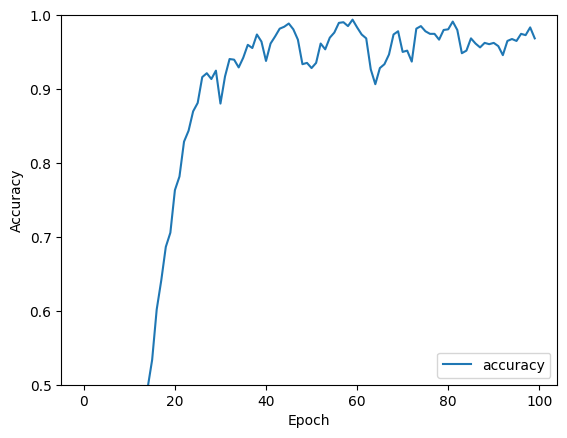

In [ ]:
plt.plot(epoch_history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

**Descriptive Analysis:**

Plot showing the change in accuracy over epochs.


#### Pipeline for training SVM, Random Forest and Linear Regression Model

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# X_dc = np.array(X_dc).reshape(1527, 3072).astype(float)
# X_dc.shape

(1527, 3072)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

**Descriptive Analysis:**

Creating model with possible parameters for hyperparameter tuning to find best model through running pipeline.

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_dc_train, y_dc_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.489956,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.217467,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.412227,{'logisticregression__C': 1}


**Descriptive Analysis:**

Best scores hyperparameter tuning running grid search over all the provided models.

In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

### 3.3 Model evaluation

#### SVM

In [ ]:
best_estimators['svm'].score(X_dc_test,y_dc_test)


0.5706806282722513

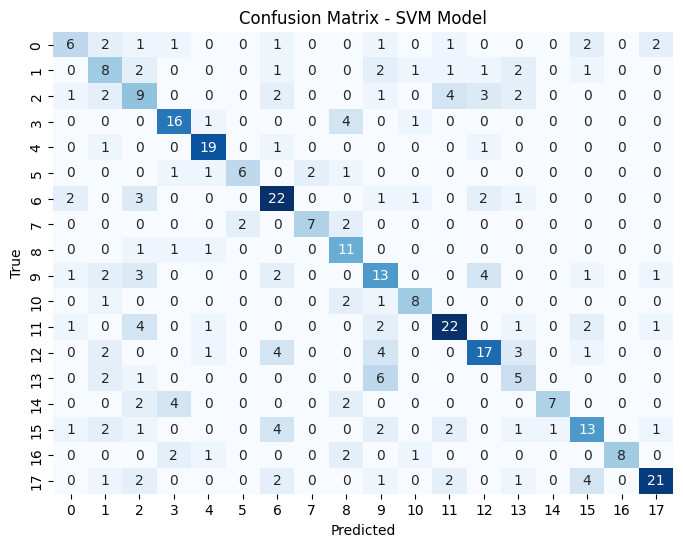

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_svm = best_estimators['svm'].predict(X_dc_test)

# Create a confusion matrix
cm_svm = confusion_matrix(y_dc_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM Model")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        17
           1       0.35      0.42      0.38        19
           2       0.31      0.38      0.34        24
           3       0.64      0.73      0.68        22
           4       0.76      0.86      0.81        22
           5       0.75      0.55      0.63        11
           6       0.56      0.69      0.62        32
           7       0.78      0.64      0.70        11
           8       0.46      0.79      0.58        14
           9       0.38      0.48      0.43        27
          10       0.67      0.67      0.67        12
          11       0.69      0.65      0.67        34
          12       0.61      0.53      0.57        32
          13       0.31      0.36      0.33        14
          14       0.88      0.47      0.61        15
          15       0.54      0.46      0.50        28
          16       1.00      0.57      0.73        14
    

#### Random Forest

In [ ]:
best_estimators['random_forest'].score(X_dc_test,y_dc_test)


0.2591623036649215

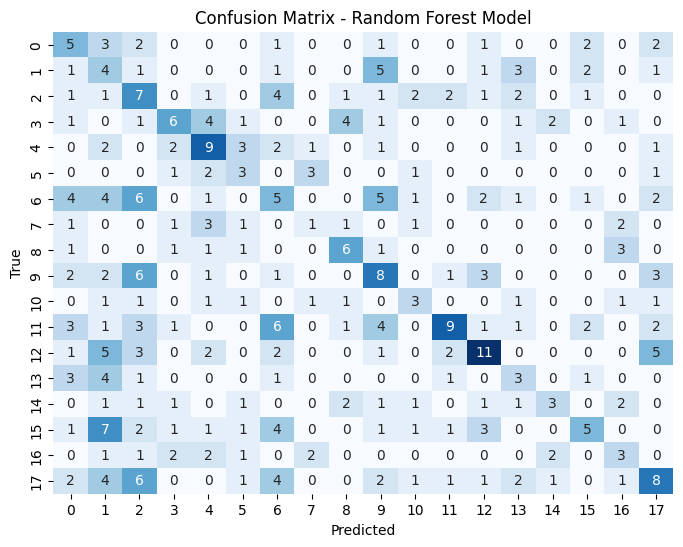

In [ ]:
y_pred_rf = best_estimators['random_forest'].predict(X_dc_test)

# Create a confusion matrix
cm_rf = confusion_matrix(y_dc_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.29      0.23        17
           1       0.10      0.21      0.14        19
           2       0.17      0.29      0.22        24
           3       0.38      0.27      0.32        22
           4       0.32      0.41      0.36        22
           5       0.21      0.27      0.24        11
           6       0.16      0.16      0.16        32
           7       0.12      0.09      0.11        11
           8       0.38      0.43      0.40        14
           9       0.25      0.30      0.27        27
          10       0.27      0.25      0.26        12
          11       0.53      0.26      0.35        34
          12       0.44      0.34      0.39        32
          13       0.19      0.21      0.20        14
          14       0.38      0.20      0.26        15
          15       0.36      0.18      0.24        28
          16       0.23      0.21      0.22        14
    

#### Logistic Regression

In [ ]:
best_estimators['logistic_regression'].score(X_dc_test,y_dc_test)


0.5261780104712042

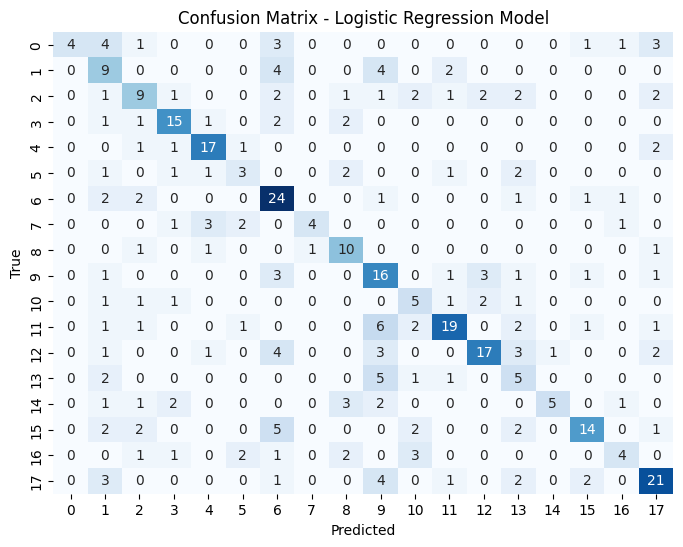

In [ ]:
y_pred_lr = best_estimators['logistic_regression'].predict(X_dc_test)

# Create a confusion matrix
cm_lr = confusion_matrix(y_dc_test, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.24      0.38        17
           1       0.30      0.47      0.37        19
           2       0.43      0.38      0.40        24
           3       0.65      0.68      0.67        22
           4       0.71      0.77      0.74        22
           5       0.33      0.27      0.30        11
           6       0.49      0.75      0.59        32
           7       0.80      0.36      0.50        11
           8       0.50      0.71      0.59        14
           9       0.38      0.59      0.46        27
          10       0.33      0.42      0.37        12
          11       0.70      0.56      0.62        34
          12       0.71      0.53      0.61        32
          13       0.24      0.36      0.29        14
          14       0.83      0.33      0.48        15
          15       0.70      0.50      0.58        28
          16       0.50      0.29      0.36        14
    

#### CNN

12/12 [==============================] - 1s 45ms/step


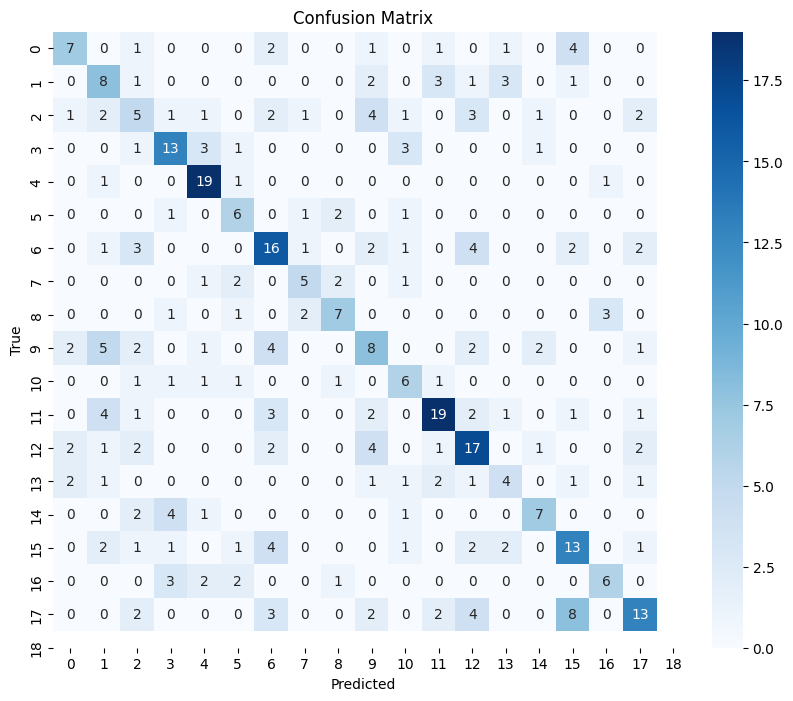

In [ ]:
y_pred_cnn = model.predict(X_dc_test_images)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
y_true_classes = np.argmax(y_dc_test_encoded, axis=1)

# Create a confusion matrix
cm_cnn = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=range(19), yticklabels=range(19))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_dc_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.32      0.42      0.36        19
           2       0.23      0.21      0.22        24
           3       0.52      0.59      0.55        22
           4       0.66      0.86      0.75        22
           5       0.40      0.55      0.46        11
           6       0.44      0.50      0.47        32
           7       0.50      0.45      0.48        11
           8       0.54      0.50      0.52        14
           9       0.31      0.30      0.30        27
          10       0.38      0.50      0.43        12
          11       0.66      0.56      0.60        34
          12       0.47      0.53      0.50        32
          13       0.36      0.29      0.32        14
          14       0.58      0.47      0.52        15
          15       0.43      0.46      0.45        28
          16       0.60      0.43      0.50        14
    

### 3.4 Analysis

In [ ]:
def plot_classwise_bar(model_name, y_true, y_pred):
    num_classes = len(set(y_true))

    report = classification_report(y_true, y_pred, output_dict=True)

    metrics_dict = {
        'Precision': [report[str(i)]['precision'] for i in range(num_classes)],
        'Recall': [report[str(i)]['recall'] for i in range(num_classes)],
        'F1-Score': [report[str(i)]['f1-score'] for i in range(num_classes)]
    }

    metrics_df = pd.DataFrame(metrics_dict, index=[str(i) for i in range(num_classes)])

    # Plot class-wise bar plots
    plt.figure(figsize=(12, 8))
    metrics_df.plot(kind='bar', colormap='viridis', edgecolor='black')
    plt.title(f'Class-wise Metrics - {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.show()

<Figure size 1200x800 with 0 Axes>

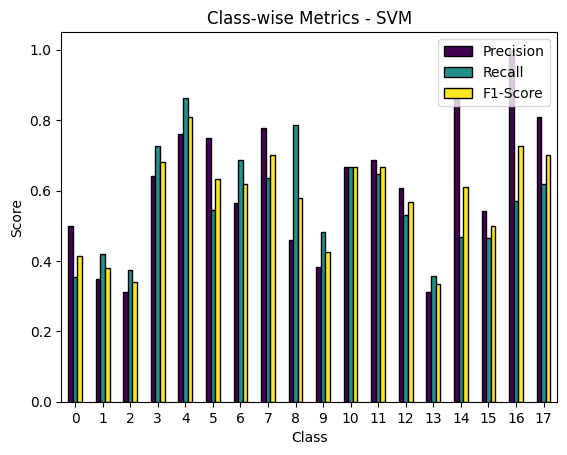

In [ ]:
plot_classwise_bar('SVM', y_dc_test, y_pred_svm)

<Figure size 1200x800 with 0 Axes>

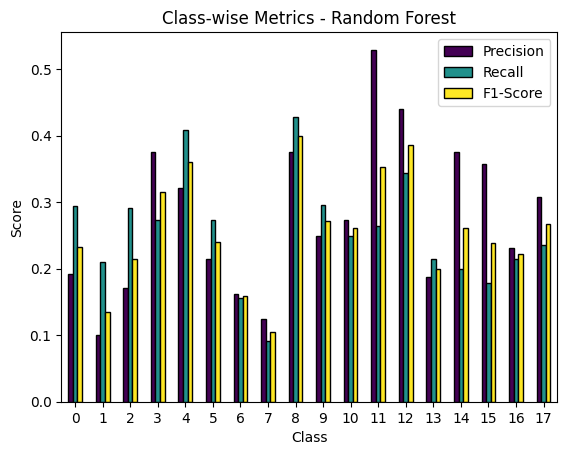

In [ ]:
plot_classwise_bar('Random Forest', y_dc_test, y_pred_rf)

<Figure size 1200x800 with 0 Axes>

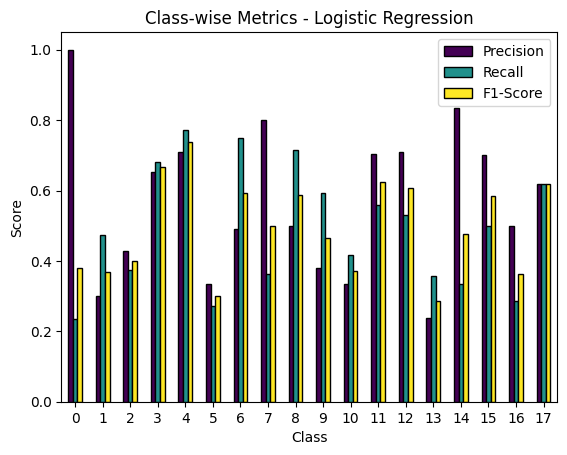

In [ ]:
plot_classwise_bar('Logistic Regression', y_dc_test, y_pred_lr)

<Figure size 1200x800 with 0 Axes>

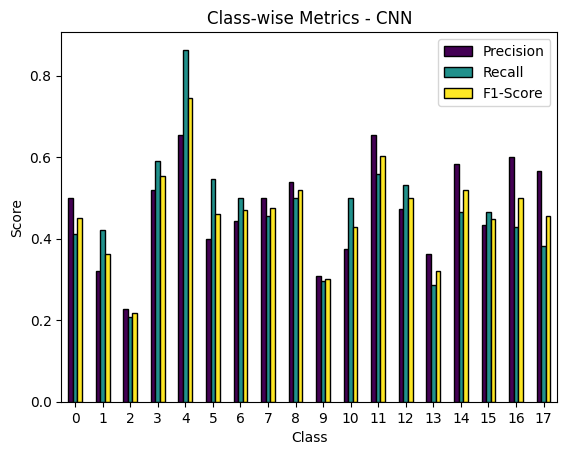

In [ ]:
plot_classwise_bar('CNN', y_dc_test, y_pred_classes)

**Descriptive Analysis:**

**SVM:**

    Accuracy: 57%
    Precision: Ranges from 31% to 78%
    Recall: Ranges from 35% to 86%
    F1-score: Ranges from 34% to 81%
The SVM model shows decent overall performance. However, there is variation in precision, recall, and F1-score across different classes. The model seems to perform well on some classes (e.g., class 4) but less effectively on others (e.g., class 2).

**Random Forest:**

    Accuracy: 26%
    Precision: Ranges from 10% to 53%
    Recall: Ranges from 9% to 47%
    F1-score: Ranges from 11% to 39%
The Random Forest model has lower accuracy compared to SVM. It exhibits a similar pattern of variation in precision, recall, and F1-score across different classes. The model struggles to perform well on most classes.

**Logistic Regression:**

    Accuracy: 53%
    Precision: Ranges from 24% to 83%
    Recall: Ranges from 29% to 75%
    F1-score: Ranges from 29% to 62%
Logistic Regression performs better than Random Forest but is still outperformed by SVM. It exhibits relatively consistent precision, recall, and F1-score across different classes.

**CNN:**
    Accuracy: 47%
    Precision: Ranges from 23% to 66%
    Recall: Ranges from 21% to 86%
    F1-score: Ranges from 22% to 75%
The CNN model shows competitive performance, outperforming Random Forest but lagging behind SVM and Logistic Regression in terms of accuracy. It exhibits variability in precision, recall, and F1-score across different classes.

**Conclusion:**
SVM generally outperforms the other models in terms of accuracy and exhibits a more balanced performance across different classes.
Logistic Regression performs reasonably well but has a slightly lower accuracy compared to SVM.
CNN shows competitive performance, but its accuracy is lower than that of SVM.
Random Forest performs the least effectively among the models evaluated.
